In [1]:
import json
import pandas as pd
import time
import numpy as np

In [2]:
import spotipy

# Import API key
# from api_keys import client_id
# if client_id == "YOUR KEY HERE!":
#     import sys
#     sys.path.append(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/APIs/config_keys/")
#     from api_keys_v2 import client_id
# from api_keys import client_secret
# if client_id == "YOUR KEY HERE!":
#     import sys
#     sys.path.append(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/APIs/config_keys/")
#     from api_keys_v2 import client_secret

client_id = 'b03657ef2fd545e29e7fe1d40fd9ab3f'
client_secret = '65bd2a4c85d24de5a03a275bfe4ac5d4'

from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="b03657ef2fd545e29e7fe1d40fd9ab3f",
#                                                            client_secret="d631ddde6bc54ca198b780254b42a99e"))


In [5]:

#open csv file and read with pandas JIC
csv_path = 'may_combined_df_viral50.csv'
may_viral_df = pd.read_csv(csv_path)
may_viral_df.head()

# Make blank column for storing the artist ID
may_viral_df['Artist ID'] = ""
may_viral_df['Genre 1'] = ""
may_viral_df['Genre 2'] = ""
may_viral_df['Genre 3'] = ""
# Make empty list to collect the artist ID
artist_id = []

for index, row in may_viral_df.iterrows():

    track_id = row['URL']
    track_features = sp.track(track_id)
    # print(track_features)
    # viral_df.loc[index, 'Artist ID'] 
    # artist_id.append(track_features['album']['artists'][0]['id'])
    may_viral_df.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']

for index, row in may_viral_df.iterrows():

    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        may_viral_df.loc[index, 'Genre 1'] = artist_features['genres'][0]
        may_viral_df.loc[index, 'Genre 2'] = artist_features['genres'][1]
        may_viral_df.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'Index {index} genre not found... skipped')
    
    time.sleep(0.1)



Index 0 genre not found... skipped
Index 1 genre not found... skipped
Index 3 genre not found... skipped
Index 4 genre not found... skipped
Index 5 genre not found... skipped
Index 9 genre not found... skipped
Index 11 genre not found... skipped
Index 13 genre not found... skipped
Index 14 genre not found... skipped
Index 15 genre not found... skipped
Index 16 genre not found... skipped
Index 19 genre not found... skipped
Index 21 genre not found... skipped
Index 22 genre not found... skipped
Index 23 genre not found... skipped
Index 27 genre not found... skipped
Index 30 genre not found... skipped
Index 32 genre not found... skipped
Index 35 genre not found... skipped
Index 36 genre not found... skipped
Index 37 genre not found... skipped
Index 39 genre not found... skipped
Index 42 genre not found... skipped
Index 43 genre not found... skipped
Index 44 genre not found... skipped
Index 46 genre not found... skipped
Index 47 genre not found... skipped
Index 49 genre not found... skippe

In [7]:
may_viral_df.value_counts('Genre 1')

Genre 1
                           24
alt z                      16
contemporary country       14
viral rap                  10
dance pop                   7
pop r&b                     7
alternative r&b             7
melodic rap                 7
afroswing                   5
country pop                 5
rap                         4
art pop                     4
bedroom soul                4
brooklyn drill              4
emo rap                     4
canadian hip hop            4
ccm                         4
indie pop                   4
corridos tumbados           4
future funk                 4
tropical house              4
escape room                 4
belarusian indie            3
corrido                     3
social media pop            3
edm                         3
north carolina hip hop      3
florida rap                 2
adult standards             2
alternative hip hop         2
nz pop                      2
bedroom pop                 2
neo-psychedelic             2
mo

In [8]:
new_may_viral_df=may_viral_df.copy()
for index, row in new_may_viral_df.iterrows():
    if row['Genre 1'] == "" :
        new_may_viral_df.loc[index, 'Genre 1'] = "unspecified"

new_may_viral_df.value_counts('Genre 1')

Genre 1
unspecified                24
alt z                      16
contemporary country       14
viral rap                  10
pop r&b                     7
melodic rap                 7
dance pop                   7
alternative r&b             7
country pop                 5
afroswing                   5
rap                         4
ccm                         4
tropical house              4
emo rap                     4
escape room                 4
corridos tumbados           4
future funk                 4
art pop                     4
indie pop                   4
canadian hip hop            4
brooklyn drill              4
bedroom soul                4
corrido                     3
social media pop            3
north carolina hip hop      3
edm                         3
belarusian indie            3
alternative hip hop         2
bedroom pop                 2
adult standards             2
dark trap                   2
florida rap                 2
nz pop                      2
ne

In [10]:
may_viral_df.head(10)

,Unnamed: 0,Position,Track Name,Artist,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,50//50,Vantage,https://open.spotify.com/track/36lNDeaRf8F8aYa...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6owH8F2INpb18PhnISiVh2,future funk,,
1,1,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,1lmU3giNF3CSbkVSQmLpHQ,tropical house,,
2,2,3,Con Tus Besos,Eslabon Armado,https://open.spotify.com/track/6WYB1odDfMPVMyp...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,0XeEobZplHxzM9QzFQWLiR,corridos tumbados,nuevo regional mexicano,sierreno
3,3,4,LMK,Lil Xxel,https://open.spotify.com/track/0efL46uAuNEfukX...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,7iDeMFJKjI1ak40N3hoYOZ,pop r&b,,
4,4,5,Yoga,645AR,https://open.spotify.com/track/2DiybJZJGXyV1UY...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,3Iv3mOsjFV8vZkXphpQ8hz,,,
5,5,6,Rockstar Shit,BLIND.SEE,https://open.spotify.com/track/2MvxhedNhxhj32e...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6SSQog9cu2XcgHTRHPmECq,viral rap,,
6,6,7,Desires (with Future),Drake,https://open.spotify.com/track/7eYAHC0RbBF9eaq...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,3TVXtAsR1Inumwj472S9r4,canadian hip hop,canadian pop,hip hop
7,7,8,Play Date,Melanie Martinez,https://open.spotify.com/track/4DpNNXFMMxQEKl7...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,63yrD80RY3RNEM2YDpUpO8,alt z,dance pop,electropop
8,8,9,IDK You Yet,Alexander 23,https://open.spotify.com/track/47EWMOElkkbMp5m...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6sFHvCyqklnJpXC9Nh1aag,alt z,electropop,indie cafe pop
9,9,10,Don't Rush (feat. Headie One),Young T & Bugsey,https://open.spotify.com/track/7LRmDx4pMTQuOBB...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6M6XXCcO5gI68XpIlrUL3Z,afroswing,uk hip hop,


In [11]:
new_may_viral_df_dropped = new_may_viral_df.drop(["Unnamed: 0"], axis=1)
new_may_viral_df_dropped.head()

,Position,Track Name,Artist,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,1,50//50,Vantage,https://open.spotify.com/track/36lNDeaRf8F8aYa...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,6owH8F2INpb18PhnISiVh2,future funk,,
1,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,1lmU3giNF3CSbkVSQmLpHQ,tropical house,,
2,3,Con Tus Besos,Eslabon Armado,https://open.spotify.com/track/6WYB1odDfMPVMyp...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,0XeEobZplHxzM9QzFQWLiR,corridos tumbados,nuevo regional mexicano,sierreno
3,4,LMK,Lil Xxel,https://open.spotify.com/track/0efL46uAuNEfukX...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,7iDeMFJKjI1ak40N3hoYOZ,pop r&b,,
4,5,Yoga,645AR,https://open.spotify.com/track/2DiybJZJGXyV1UY...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,2020-05-07,19,Viral 50,3Iv3mOsjFV8vZkXphpQ8hz,unspecified,,


In [12]:

#open csv file and read with pandas JIC
csv_path = 'july_combined_df_viral50.csv'
july_viral_df = pd.read_csv(csv_path)
july_viral_df.head()

# Make blank column for storing the artist ID
july_viral_df['Artist ID'] = ""
july_viral_df['Genre 1'] = ""
july_viral_df['Genre 2'] = ""
july_viral_df['Genre 3'] = ""
# Make empty list to collect the artist ID
artist_id = []

for index, row in july_viral_df.iterrows():

    track_id = row['URL']
    track_features = sp.track(track_id)
    # print(track_features)
    # viral_df.loc[index, 'Artist ID'] 
    # artist_id.append(track_features['album']['artists'][0]['id'])
    july_viral_df.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']


for index, row in july_viral_df.iterrows():

    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        july_viral_df.loc[index, 'Genre 1'] = artist_features['genres'][0]
        july_viral_df.loc[index, 'Genre 2'] = artist_features['genres'][1]
        july_viral_df.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'Index {index} genre not found... skipped')
    
    time.sleep(0.2)

july_viral_df.head()

Index 0 genre not found... skipped
Index 1 genre not found... skipped
Index 2 genre not found... skipped
Index 3 genre not found... skipped
Index 4 genre not found... skipped
Index 5 genre not found... skipped
Index 6 genre not found... skipped
Index 9 genre not found... skipped
Index 10 genre not found... skipped
Index 11 genre not found... skipped
Index 12 genre not found... skipped
Index 13 genre not found... skipped
Index 14 genre not found... skipped
Index 15 genre not found... skipped
Index 16 genre not found... skipped
Index 17 genre not found... skipped
Index 18 genre not found... skipped
Index 20 genre not found... skipped
Index 22 genre not found... skipped
Index 23 genre not found... skipped
Index 24 genre not found... skipped
Index 26 genre not found... skipped
Index 27 genre not found... skipped
Index 28 genre not found... skipped
Index 29 genre not found... skipped
Index 33 genre not found... skipped
Index 37 genre not found... skipped
Index 38 genre not found... skipped


,Unnamed: 0,Position,Track Name,Artist,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,I See Red,Everybody Loves an Outlaw,https://open.spotify.com/track/2Xau3uNsnIb9Fwz...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,5RCWMaArEntbkeWYVxCiFW,modern blues rock,,
1,1,2,Then Leave (feat. Queendom Come),BeatKing,https://open.spotify.com/track/2Xoc4gqPbBa3QHK...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,5L8p9kDnX2cgoI8VLUL2p4,houston rap,,
2,2,3,Stunnin' (feat. Harm Franklin),Curtis Waters,https://open.spotify.com/track/2D0dj3hVkRQJCp6...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,2JbE7jUIGtpXSzytnyMg6U,,,
3,3,4,Hood Baby,KBFR,https://open.spotify.com/track/5au5NgWCdev4WeL...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,0JFjWic1b9Mvv7WcNYhDvZ,viral rap,,
4,4,5,Hard For Me,Michele Morrone,https://open.spotify.com/track/00PesUdTmC3Y5xt...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,03fLoIOO015incUitpfkad,,,


In [13]:
new_july_viral_df=july_viral_df.copy()
for index, row in new_july_viral_df.iterrows():
    if row['Genre 1'] == "" :
        new_july_viral_df.loc[index, 'Genre 1'] = "unspecified"

new_july_viral_df.value_counts('Genre 1')

Genre 1
unspecified                 18
alternative r&b             10
hollywood                    9
melodic rap                  8
viral rap                    8
                            ..
deep underground hip hop     1
german pop                   1
emo rap                      1
escape room                  1
adult standards              1
Length: 62, dtype: int64

In [14]:
new_july_viral_df

,Unnamed: 0,Position,Track Name,Artist,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,I See Red,Everybody Loves an Outlaw,https://open.spotify.com/track/2Xau3uNsnIb9Fwz...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,5RCWMaArEntbkeWYVxCiFW,modern blues rock,,
1,1,2,Then Leave (feat. Queendom Come),BeatKing,https://open.spotify.com/track/2Xoc4gqPbBa3QHK...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,5L8p9kDnX2cgoI8VLUL2p4,houston rap,,
2,2,3,Stunnin' (feat. Harm Franklin),Curtis Waters,https://open.spotify.com/track/2D0dj3hVkRQJCp6...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,2JbE7jUIGtpXSzytnyMg6U,unspecified,,
3,3,4,Hood Baby,KBFR,https://open.spotify.com/track/5au5NgWCdev4WeL...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,0JFjWic1b9Mvv7WcNYhDvZ,viral rap,,
4,4,5,Hard For Me,Michele Morrone,https://open.spotify.com/track/00PesUdTmC3Y5xt...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,03fLoIOO015incUitpfkad,unspecified,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,45,46,Past Life (with Selena Gomez),Trevor Daniel,https://open.spotify.com/track/4P6IttK2PRBjyr3...,viral-us-weekly-2020-07-23--2020-07-23.csv,July,2020-07-23,30,Viral 50,7uaIm6Pw7xplS8Dy06V6pT,alternative r&b,melodic rap,pop rap
196,46,47,Судно (Борис Рижий),Molchat Doma,https://open.spotify.com/track/6DONTnamNDOJdO6...,viral-us-weekly-2020-07-23--2020-07-23.csv,July,2020-07-23,30,Viral 50,1nVq0hKIVReeaiB3xJgKf0,belarusian indie,russian post-punk,sovietwave
197,47,48,Renee,SALES,https://open.spotify.com/track/5MeUMSRreLHYLhw...,viral-us-weekly-2020-07-23--2020-07-23.csv,July,2020-07-23,30,Viral 50,6vVztIuqdDHvYWxOEXCzjN,indie pop,orlando indie,
198,48,49,"PORFA Remix ( Feat. Maluma, Nicky Jam, Sech) -...",Feid,https://open.spotify.com/track/7lUdbnz7wsv3C9z...,viral-us-weekly-2020-07-23--2020-07-23.csv,July,2020-07-23,30,Viral 50,2LRoIwlKmHjgvigdNGBHNo,colombian pop,latin,pop reggaeton


In [15]:
new_july_viral_df_dropped = new_july_viral_df.drop(["Unnamed: 0"], axis=1)
new_july_viral_df_dropped.head()

,Position,Track Name,Artist,URL,Filename,Month,Date,Week Number,Type,Artist ID,Genre 1,Genre 2,Genre 3
0,1,I See Red,Everybody Loves an Outlaw,https://open.spotify.com/track/2Xau3uNsnIb9Fwz...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,5RCWMaArEntbkeWYVxCiFW,modern blues rock,,
1,2,Then Leave (feat. Queendom Come),BeatKing,https://open.spotify.com/track/2Xoc4gqPbBa3QHK...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,5L8p9kDnX2cgoI8VLUL2p4,houston rap,,
2,3,Stunnin' (feat. Harm Franklin),Curtis Waters,https://open.spotify.com/track/2D0dj3hVkRQJCp6...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,2JbE7jUIGtpXSzytnyMg6U,unspecified,,
3,4,Hood Baby,KBFR,https://open.spotify.com/track/5au5NgWCdev4WeL...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,0JFjWic1b9Mvv7WcNYhDvZ,viral rap,,
4,5,Hard For Me,Michele Morrone,https://open.spotify.com/track/00PesUdTmC3Y5xt...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,2020-07-02,27,Viral 50,03fLoIOO015incUitpfkad,unspecified,,


In [ ]:


#open csv file and read with pandas JIC
csv_path = 'july_combined_df_top200.csv'
july_top200_df = pd.read_csv(csv_path)
july_top200_df.head()

# Make blank column for storing the artist ID
july_top200_df['Artist ID'] = ""
july_top200_df['Genre 1'] = ""
july_top200_df['Genre 2'] = ""
july_top200_df['Genre 3'] = ""
# Make empty list to collect the artist ID
artist_id = []

for index, row in july_top200_df.iterrows():

    track_id = row['URL']
    track_features = sp.track(track_id)
    # print(track_features)
    # viral_df.loc[index, 'Artist ID'] 
    # artist_id.append(track_features['album']['artists'][0]['id'])
    july_top200_df.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']

for index, row in july_top200_df.iterrows():

    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        july_top200_df.loc[index, 'Genre 1'] = artist_features['genres'][0]
        july_top200_df.loc[index, 'Genre 2'] = artist_features['genres'][1]
        july_top200_df.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'Index {index} genre not found... skipped')
    
    time.sleep(0.2)
july_top200_df.head()

In [ ]:
#open csv file and read with pandas JIC
csv_path = 'may_combined_df_top200.csv'
may_top200_df = pd.read_csv(csv_path)
may_top200_df.head()

# Make blank column for storing the artist ID
may_top200_df['Artist ID'] = ""
may_top200_df['Genre 1'] = ""
may_top200_df['Genre 2'] = ""
may_top200_df['Genre 3'] = ""
# Make empty list to collect the artist ID
artist_id = []

for index, row in may_top200_df.iterrows():

    track_id = row['URL']
    track_features = sp.track(track_id)
    # print(track_features)
    # viral_df.loc[index, 'Artist ID'] 
    # artist_id.append(track_features['album']['artists'][0]['id'])
    may_top200_df.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']

for index, row in may_top200_df.iterrows():

    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        may_top200_df.loc[index, 'Genre 1'] = artist_features['genres'][0]
        may_top200_df.loc[index, 'Genre 2'] = artist_features['genres'][1]
        may_top200_df.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'Index {index} genre not found... skipped')
    
    time.sleep(0.2)
may_top200_df.head()

In [ ]:
new_may_top200_df=may_top200_df.copy()
for index, row in new_may_top200_df.iterrows():
    if row['Genre 1'] == "" :
        new_may_top200_df.loc[index, 'Genre 1'] = "unspecified"

new_may_top200_df.value_counts('Genre 1')

In [ ]:
new_july_top200_df=july_top200_df.copy()
for index, row in new_july_top200_df.iterrows():
    if row['Genre 1'] == "" :
        new_july_top200_df.loc[index, 'Genre 1'] = "unspecified"

new_july_top200_df.value_counts('Genre 1')

In [ ]:
new_july_top200_df.head(10)

In [ ]:
new_july_top200_df_dropped = new_july_top200_df.drop(["Unnamed: 0"], axis=1)

In [ ]:
new_july_top200_df_dropped

In [ ]:
new_may_top200_df_dropped = new_may_top200_df.drop(["Unnamed: 0"], axis=1)
new_may_top200_df_dropped.head()

In [ ]:
viral_mayjuly_df_reindex = pd.concat([new_may_viral_df_dropped,new_july_viral_df_dropped], ignore_index=True)
viral_mayjuly_df_reindex

In [ ]:
top200_mayjuly_df_reindex = pd.concat([new_may_top200_df_dropped,new_july_top200_df_dropped], ignore_index=True)
top200_mayjuly_df_reindex

In [ ]:
top200_mayjuly_df_reindex.to_csv('combined_top_200_mayjuly.csv')

In [ ]:
viral_mayjuly_df_reindex.to_csv('combined_viral_mayjuly.csv')

In [ ]:
new_may_top200_df_dropped['Streams'].sum()

In [ ]:
new_may_top200_df_dropped['Streams'].cumsum()

In [ ]:
new_may_top200_df_dropped.describe()

In [47]:
csv_path = 'sept_combined_viral.csv'
sept_viral_df = pd.read_csv(csv_path)
sept_viral_df.head()
sept_viral_df['Artist ID'] = ""
sept_viral_df['Genre 1'] = ""
sept_viral_df['Genre 2'] = ""
sept_viral_df['Genre 3'] = ""
# Make empty list to collect the artist ID
artist_id = []

for index, row in sept_viral_df.iterrows():

    track_id = row['URL']
    track_features = sp.track(track_id)
    # print(track_features)
    # viral_df.loc[index, 'Artist ID'] 
    # artist_id.append(track_features['album']['artists'][0]['id'])
    sept_viral_df.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']

for index, row in sept_viral_df.iterrows():

    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        sept_viral_df.loc[index, 'Genre 1'] = artist_features['genres'][0]
        sept_viral_df.loc[index, 'Genre 2'] = artist_features['genres'][1]
        sept_viral_df.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'Index {index} genre not found... skipped')
    
    time.sleep(0.1)
sept_viral_df.head()

Index 2 genre not found... skipped
Index 3 genre not found... skipped
Index 4 genre not found... skipped
Index 5 genre not found... skipped
Index 6 genre not found... skipped
Index 7 genre not found... skipped
Index 8 genre not found... skipped
Index 13 genre not found... skipped
Index 14 genre not found... skipped
Index 15 genre not found... skipped
Index 16 genre not found... skipped
Index 17 genre not found... skipped
Index 18 genre not found... skipped
Index 20 genre not found... skipped
Index 21 genre not found... skipped
Index 22 genre not found... skipped
Index 23 genre not found... skipped
Index 25 genre not found... skipped
Index 29 genre not found... skipped
Index 30 genre not found... skipped
Index 31 genre not found... skipped
Index 39 genre not found... skipped
Index 40 genre not found... skipped
Index 41 genre not found... skipped
Index 42 genre not found... skipped
Index 43 genre not found... skipped
Index 48 genre not found... skipped
Index 49 genre not found... skipped

,Unnamed: 0,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,Mad at Disney,salem ilese,https://open.spotify.com/track/7aGyRfJWtLqgJaZ...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,3QJUFtGBGL05vo0kCJZsmT,alt z,modern indie pop,social media pop
1,1,2,WAP (feat. Megan Thee Stallion),Cardi B,https://open.spotify.com/track/4Oun2ylbjFKMPTi...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,4kYSro6naA4h99UJvo89HB,pop,pop rap,post-teen pop
2,2,3,Mood (feat. iann dior),24kGoldn,https://open.spotify.com/track/3tjFYV6RSFtuktY...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,6fWVd57NKTalqvmjRd2t8Z,cali rap,,
3,3,4,3 Musketeers,NextYoungin,https://open.spotify.com/track/57Oi4yqY27uJzCy...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,2u1aL8XADqj0nJFHMKRjNw,viral rap,,
4,4,5,Backyard Boy,Claire Rosinkranz,https://open.spotify.com/track/0QpOqKz66ZxHNqj...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,3V0ZQW0dNuVaFtbVYgSI24,modern indie pop,,


In [51]:
new_sept_viral_df=sept_viral_df.copy()
for index, row in new_sept_viral_df.iterrows():
    if row['Genre 1'] == "" :
        new_sept_viral_df.loc[index, 'Genre 1'] = "unspecified"

new_sept_viral_df.value_counts('Genre 1')

Genre 1
alt z                     28
contemporary country      16
viral rap                 16
latin                     15
unspecified               13
modern indie pop          11
dance pop                  8
pop                        6
social media pop           5
k-pop                      5
cali rap                   5
bedroom pop                4
pop r&b                    4
pop rap                    4
cubaton                    4
glitchcore                 4
atl trap                   3
detroit trap               3
indie pop                  3
chicago rap                3
ohio hip hop               3
sad rap                    3
houston rap                2
hip hop                    2
bc underground hip hop     2
brooklyn drill             2
canadian hip hop           2
trap                       2
ccm                        2
flint hip hop              2
alternative r&b            1
alternative hip hop        1
canadian americana         1
afrofuturism               1
yaoi  

In [52]:
new_sept_viral_df_dropped = new_sept_viral_df.drop(["Unnamed: 0"], axis=1)
new_sept_viral_df_dropped.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,Mad at Disney,salem ilese,https://open.spotify.com/track/7aGyRfJWtLqgJaZ...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,3QJUFtGBGL05vo0kCJZsmT,alt z,modern indie pop,social media pop
1,2,WAP (feat. Megan Thee Stallion),Cardi B,https://open.spotify.com/track/4Oun2ylbjFKMPTi...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,4kYSro6naA4h99UJvo89HB,pop,pop rap,post-teen pop
2,3,Mood (feat. iann dior),24kGoldn,https://open.spotify.com/track/3tjFYV6RSFtuktY...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,6fWVd57NKTalqvmjRd2t8Z,cali rap,,
3,4,3 Musketeers,NextYoungin,https://open.spotify.com/track/57Oi4yqY27uJzCy...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,2u1aL8XADqj0nJFHMKRjNw,viral rap,,
4,5,Backyard Boy,Claire Rosinkranz,https://open.spotify.com/track/0QpOqKz66ZxHNqj...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,3V0ZQW0dNuVaFtbVYgSI24,modern indie pop,,


In [48]:
csv_path = 'nov_combined_viral.csv'
nov_viral_df = pd.read_csv(csv_path)
nov_viral_df.head()
nov_viral_df['Artist ID'] = ""
nov_viral_df['Genre 1'] = ""
nov_viral_df['Genre 2'] = ""
nov_viral_df['Genre 3'] = ""
# Make empty list to collect the artist ID
artist_id = []

for index, row in nov_viral_df.iterrows():

    track_id = row['URL']
    track_features = sp.track(track_id)
    # print(track_features)
    # viral_df.loc[index, 'Artist ID'] 
    # artist_id.append(track_features['album']['artists'][0]['id'])
    nov_viral_df.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']

for index, row in nov_viral_df.iterrows():

    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        nov_viral_df.loc[index, 'Genre 1'] = artist_features['genres'][0]
        nov_viral_df.loc[index, 'Genre 2'] = artist_features['genres'][1]
        nov_viral_df.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'Index {index} genre not found... skipped')
    
    time.sleep(0.1)
nov_viral_df.head()

Index 0 genre not found... skipped
Index 1 genre not found... skipped
Index 2 genre not found... skipped
Index 3 genre not found... skipped
Index 4 genre not found... skipped
Index 5 genre not found... skipped
Index 6 genre not found... skipped
Index 7 genre not found... skipped
Index 8 genre not found... skipped
Index 9 genre not found... skipped
Index 10 genre not found... skipped
Index 11 genre not found... skipped
Index 12 genre not found... skipped
Index 13 genre not found... skipped
Index 14 genre not found... skipped
Index 15 genre not found... skipped
Index 16 genre not found... skipped
Index 17 genre not found... skipped
Index 20 genre not found... skipped
Index 23 genre not found... skipped
Index 24 genre not found... skipped
Index 25 genre not found... skipped
Index 26 genre not found... skipped
Index 27 genre not found... skipped
Index 28 genre not found... skipped
Index 29 genre not found... skipped
Index 33 genre not found... skipped
Index 34 genre not found... skipped
In

,Unnamed: 0,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,E-GIRLS ARE RUINING MY LIFE!,CORPSE,https://open.spotify.com/track/7bCfHiRcfUjG0YV...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,7yntSJ6uojO3z6GFUVwhAW,viral rap,,
1,1,2,Trump Is Your President,Bryson Gray,https://open.spotify.com/track/3PdQfXbIuEjUoNl...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,66pGC6EHiiLr7Ce6twM5bk,,,
2,2,3,Die Very Rough,Mario Judah,https://open.spotify.com/track/1AyrLa7PkFQvt1A...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,5HFSWl4JPwju06kHxukvTe,meme rap,,
3,3,4,Touch You,遠野高志,https://open.spotify.com/track/6qWEpnyU43Bcrx3...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,01ACNPPnzgrwcqlbX6eo3x,,,
4,4,5,Monster Mash,"Bobby ""Boris"" Pickett",https://open.spotify.com/track/0xxZY5C9xxij3D1...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,42MRYPhQfcEXqb18dl5ERX,halloween,novelty,


In [55]:
new_nov_viral_df=nov_viral_df.copy()
for index, row in new_nov_viral_df.iterrows():
    if row['Genre 1'] == "" :
        new_nov_viral_df.loc[index, 'Genre 1'] = "unspecified"

new_nov_viral_df.value_counts('Genre 1')

Genre 1
unspecified                 39
viral rap                   18
alt z                       12
indie r&b                    8
meme rap                     7
trap                         6
australian hip hop           6
dance pop                    5
contemporary country         5
bedroom pop                  5
chicago rap                  5
vapor soul                   4
slap house                   4
corridos tumbados            4
k-pop                        4
j-pop                        3
philly rap                   3
cali rap                     3
belarusian indie             3
pop                          3
sad rap                      3
atl trap                     3
deep groove house            3
canadian pop                 2
celtic                       2
deep underground hip hop     2
bedroom soul                 2
australian indie             2
afroswing                    2
soft rock                    2
social media pop             2
russian hip hop              2


In [56]:
new_nov_viral_df_dropped = new_nov_viral_df.drop(["Unnamed: 0"], axis=1)
new_nov_viral_df_dropped.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,E-GIRLS ARE RUINING MY LIFE!,CORPSE,https://open.spotify.com/track/7bCfHiRcfUjG0YV...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,7yntSJ6uojO3z6GFUVwhAW,viral rap,,
1,2,Trump Is Your President,Bryson Gray,https://open.spotify.com/track/3PdQfXbIuEjUoNl...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,66pGC6EHiiLr7Ce6twM5bk,unspecified,,
2,3,Die Very Rough,Mario Judah,https://open.spotify.com/track/1AyrLa7PkFQvt1A...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,5HFSWl4JPwju06kHxukvTe,meme rap,,
3,4,Touch You,遠野高志,https://open.spotify.com/track/6qWEpnyU43Bcrx3...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,01ACNPPnzgrwcqlbX6eo3x,unspecified,,
4,5,Monster Mash,"Bobby ""Boris"" Pickett",https://open.spotify.com/track/0xxZY5C9xxij3D1...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,42MRYPhQfcEXqb18dl5ERX,halloween,novelty,


In [ ]:
# genre_data_may_viral= {'Genre': ['Rap'],
# ['Count']: [len(new_may_viral_df_dropped[new_may_viral_df_dropped['Genre 1'].str.contains("rap")]| [new_may_viral_df_dropped['Genre 1'].str.contains("hip hop")]|new_may_viral_df_dropped[new_may_viral_df_dropped['Genre 1'].str.contains("trap")])}
# genre_df = pd.DataFrame(genre_data)

In [70]:
csv_path = 'jan_viral_50.csv'
jan_viral_df = pd.read_csv(csv_path)
jan_viral_df.head()
jan_viral_df['Artist ID'] = ""
jan_viral_df['Genre 1'] = ""
jan_viral_df['Genre 2'] = ""
jan_viral_df['Genre 3'] = ""
# Make empty list to collect the artist ID
artist_id = []

for index, row in jan_viral_df.iterrows():

    track_id = row['URL']
    track_features = sp.track(track_id)
    # print(track_features)
    # viral_df.loc[index, 'Artist ID'] 
    # artist_id.append(track_features['album']['artists'][0]['id'])
    jan_viral_df.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']

for index, row in jan_viral_df.iterrows():

    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        jan_viral_df.loc[index, 'Genre 1'] = artist_features['genres'][0]
        jan_viral_df.loc[index, 'Genre 2'] = artist_features['genres'][1]
        jan_viral_df.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'Index {index} genre not found... skipped')
    
    time.sleep(0.1)
jan_viral_df.head()

Index 1 genre not found... skipped
Index 2 genre not found... skipped
Index 4 genre not found... skipped
Index 5 genre not found... skipped
Index 6 genre not found... skipped
Index 7 genre not found... skipped
Index 9 genre not found... skipped
Index 14 genre not found... skipped
Index 18 genre not found... skipped
Index 20 genre not found... skipped
Index 24 genre not found... skipped
Index 25 genre not found... skipped
Index 26 genre not found... skipped
Index 27 genre not found... skipped
Index 36 genre not found... skipped
Index 40 genre not found... skipped
Index 41 genre not found... skipped
Index 43 genre not found... skipped
Index 46 genre not found... skipped
Index 47 genre not found... skipped
Index 48 genre not found... skipped
Index 51 genre not found... skipped
Index 52 genre not found... skipped
Index 54 genre not found... skipped
Index 55 genre not found... skipped
Index 58 genre not found... skipped
Index 59 genre not found... skipped
Index 60 genre not found... skipped

,Unnamed: 0,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,The Box,Roddy Ricch,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,1,2,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,https://open.spotify.com/track/4Yxc55NX3tAXC2m...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,1McMsnEElThX1knmY4oliG,pop,post-teen pop,
2,2,3,Blueberry Fergo,Lil Monet,https://open.spotify.com/track/6CrMU5zXlKNGsip...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,19FsxZm98evcrjWFFhHnC4,,,
3,3,4,GOODMORNINGTOKYO!,TOKYO’S REVENGE,https://open.spotify.com/track/0Q2n5yzl2XRqYbV...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,5TbLOwv8BNnik3f03NZJlt,meme rap,sad rap,vapor trap
4,4,5,Kraazy,Likybo,https://open.spotify.com/track/3s2Qd1rsWqbvOox...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,16Nc36xAtNyQ7BMBcDsaLv,cali rap,,


In [ ]:
new_nov_viral_df=nov_viral_df.copy()
for index, row in new_nov_viral_df.iterrows():
    if row['Genre 1'] == "" :
        new_nov_viral_df.loc[index, 'Genre 1'] = "unspecified"

new_nov_viral_df.value_counts('Genre 1')

In [ ]:
import matplotlib.pyplot as plt


https://matplotlib.org/stable/gallery/statistics/hist.html

In [34]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
category1 = new_may_viral_df_dropped["Genre 1"]
category2 = new_july_viral_df_dropped["Genre 1"]

<Figure size 1800x1440 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

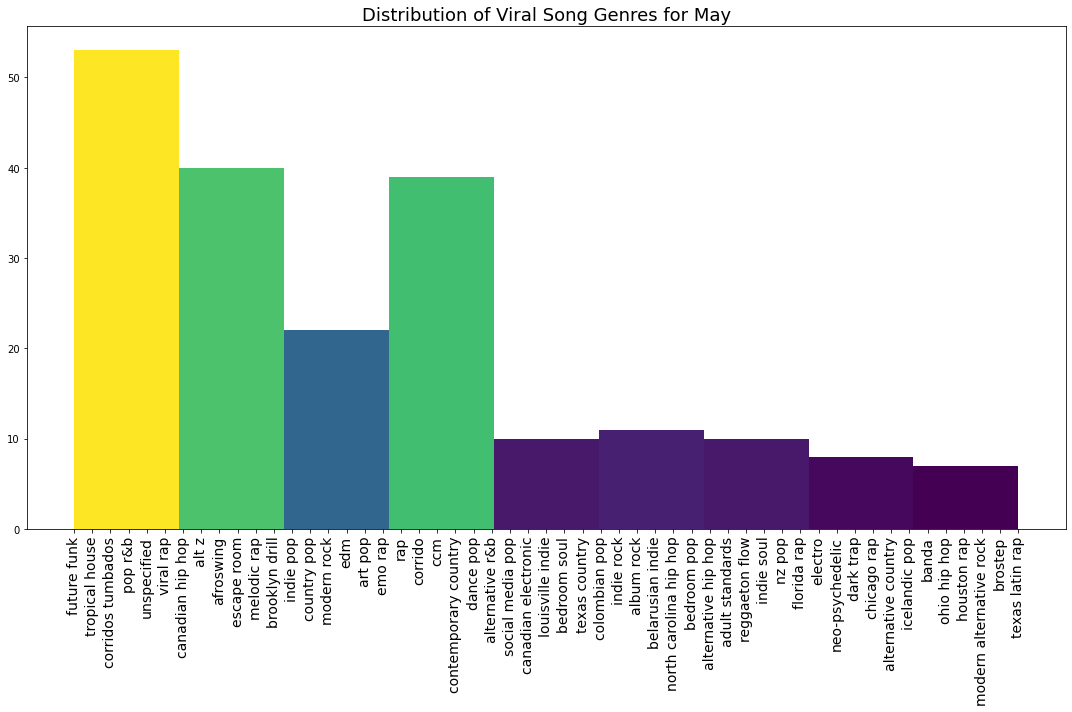

In [69]:
from matplotlib import colors
#https://matplotlib.org/stable/gallery/statistics/hist.html
plt.gcf().set_size_inches(25,20)
plt.figure(figsize=[15, 10])
# plt.figure(figsize=(15, 10)) 
fig, axs = plt.subplots(1, tight_layout=True)
# figsize=(25, 15)
# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(category1, bins='auto')
# N, bins, patches = axs[1].hist(category2, bins='auto')
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs.hist(category1, bins='auto', density=True)
plt.xticks(rotation=90, size=14)
plt.title("Distribution of Viral Song Genres for May", size=18)
plt.gcf().set_size_inches(15,10)
plt.show()

<Figure size 1080x720 with 0 Axes>

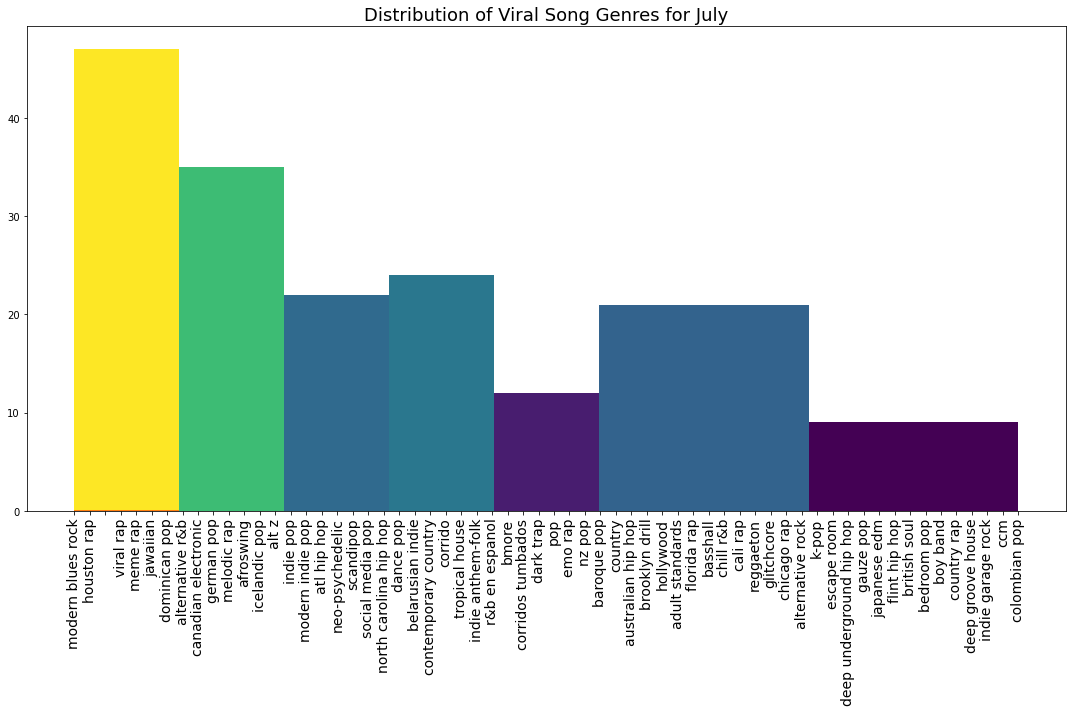

In [68]:
from matplotlib import colors
#https://matplotlib.org/stable/gallery/statistics/hist.html

# plt.figure()

plt.figure(figsize=(15, 10)) 
fig, ax = plt.subplots(1, tight_layout=True)
# figsize=(25, 15)
# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = ax.hist(category2, bins='auto')
# N, bins, patches = axs[1].hist(category2, bins='auto')
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
ax.hist(category2, bins='auto', density=True)
plt.xticks(rotation=90, size=14)
plt.title("Distribution of Viral Song Genres for July", size=18)
plt.gcf().set_size_inches(15,10)
plt.show()

In [145]:

category3 = new_sept_viral_df_dropped["Genre 1"]
category4 = new_nov_viral_df_dropped["Genre 1"]


<Figure size 1800x1440 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

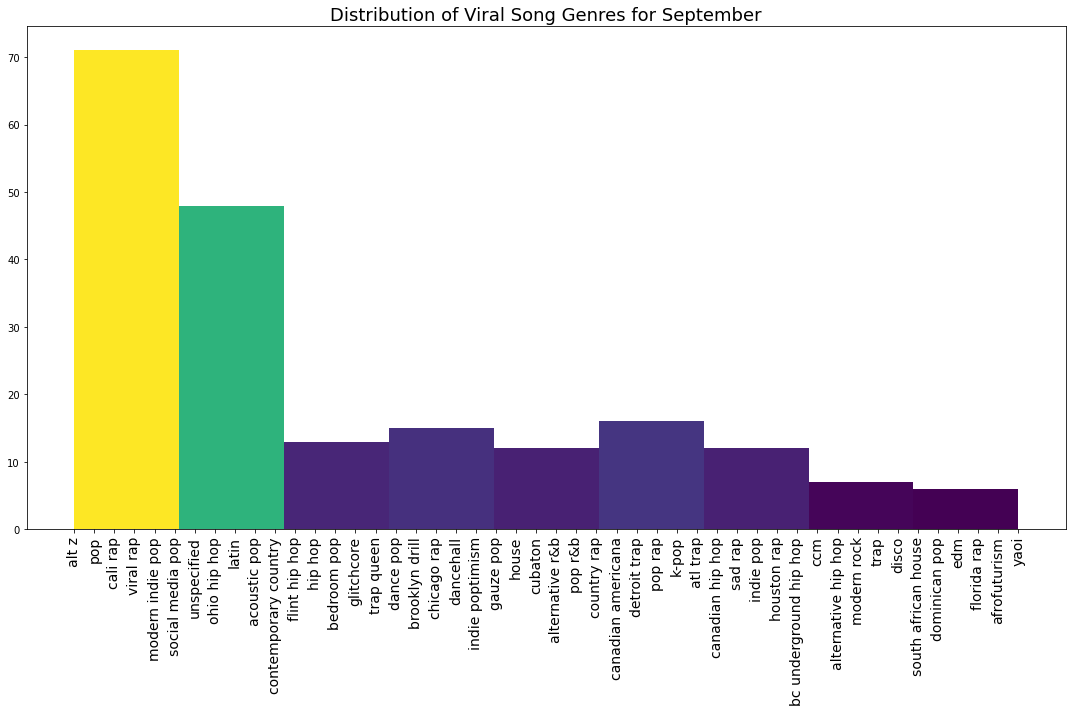

In [67]:
from matplotlib import colors
#https://matplotlib.org/stable/gallery/statistics/hist.html
plt.gcf().set_size_inches(25,20)
plt.figure(figsize=[15, 10])
# plt.figure(figsize=(15, 10)) 
fig, axs = plt.subplots(1, tight_layout=True)
# figsize=(25, 15)
# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(category3, bins='auto')
# N, bins, patches = axs[1].hist(category2, bins='auto')
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs.hist(category3, bins='auto', density=True)
plt.xticks(rotation=90, size=14)
plt.title("Distribution of Viral Song Genres for September", size=18)
plt.gcf().set_size_inches(15,10)
plt.show()



<Figure size 1800x1440 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

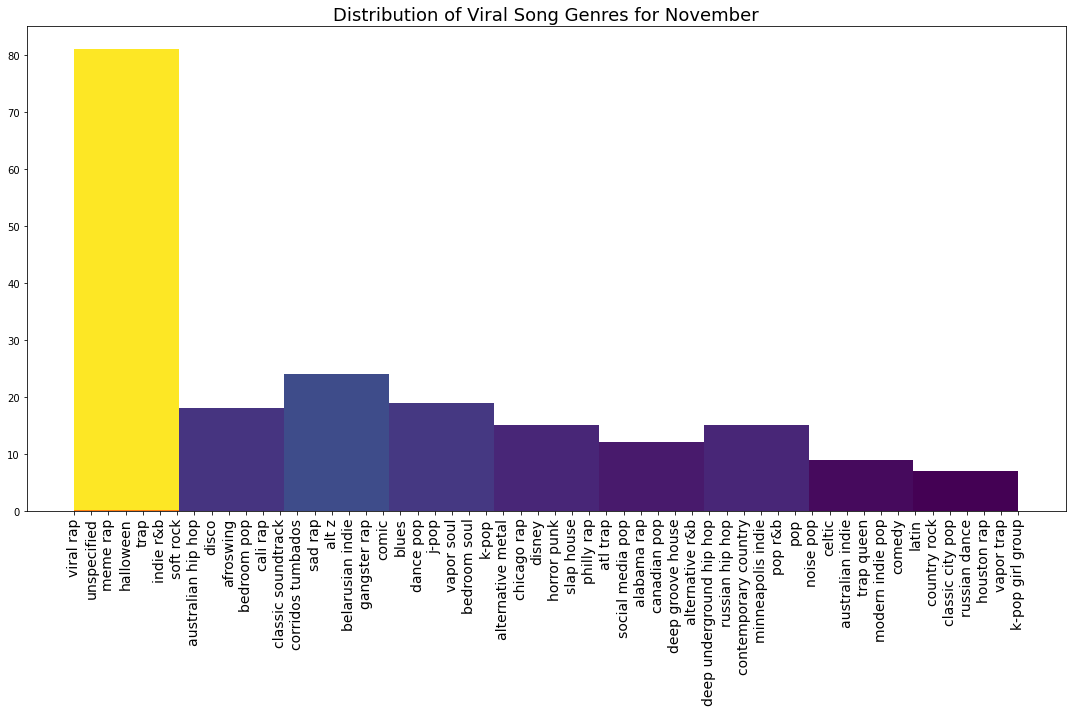

In [66]:
from matplotlib import colors
#https://matplotlib.org/stable/gallery/statistics/hist.html
plt.gcf().set_size_inches(25,20)
plt.figure(figsize=[15, 10])
# plt.figure(figsize=(15, 10)) 
fig, axs = plt.subplots(1, tight_layout=True)
# figsize=(25, 15)
# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(category4, bins='auto')
# N, bins, patches = axs[1].hist(category2, bins='auto')
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs.hist(category4, bins='auto', density=True)
plt.xticks(rotation=90, size=14)
plt.title("Distribution of Viral Song Genres for November", size=18)
plt.gcf().set_size_inches(15,10)
plt.show()


In [ ]:
labels = ['May', 'July']
may_max_streams = new_may_top200_df_dropped['Streams'].max()
may_max_streams = new_may_top200_df_dropped['Streams'].max()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, may_max_streams, width, label='May')
rects2 = ax.bar(x + width/2, may_max_streams, width, label='July')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Months')
ax.set_title('Max Streams in the Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [146]:
month_genre_df['May'] = pd.DataFrame(category1)

In [147]:
month_genre_df.head()

,May,July,September,November
0,future funk,modern blues rock,alt z,viral rap
1,tropical house,houston rap,pop,unspecified
2,corridos tumbados,,cali rap,meme rap
3,pop r&b,viral rap,viral rap,unspecified
4,unspecified,,modern indie pop,halloween


In [143]:
month_genre_df['July'] = pd.DataFrame(category2)
month_genre_df['September'] = pd.DataFrame(category3)
month_genre_df['November'] = pd.DataFrame(category4)
month_genre = month_genre_df
month_genre.head(10)

,May,July,September,November
0,future funk,modern blues rock,alt z,viral rap
1,tropical house,houston rap,pop,unspecified
2,corridos tumbados,,cali rap,meme rap
3,pop r&b,viral rap,viral rap,unspecified
4,unspecified,,modern indie pop,halloween
5,viral rap,meme rap,alt z,trap
6,canadian hip hop,jawaiian,social media pop,indie r&b
7,alt z,dominican pop,unspecified,indie r&b
8,alt z,alternative r&b,ohio hip hop,unspecified
9,afroswing,,latin,unspecified


In [104]:
import pandas as pd
pd.options.plotting.backend = 'plotly'



In [28]:
combine_viral= pd.concat([new_may_viral_df_dropped,new_july_viral_df_dropped, new_sept_viral_df_dropped, new_nov_viral_df_dropped], ignore_index=True)
combine_viral

NameError: name 'new_sept_viral_df_dropped' is not defined

In [164]:
grouped = combine_viral['Genre 1'].value_counts()

unspecified             76
alt z                   64
viral rap               52
contemporary country    41
dance pop               25
                        ..
alabama rap              1
banda                    1
country                  1
indie rock               1
indie soul               1
Name: Genre 1, Length: 132, dtype: int64

In [24]:
grouped.count()

85

In [25]:
grouped.value_counts()

1     28
3     13
4     12
5     10
7      4
6      4
2      4
9      3
42     1
24     1
20     1
18     1
17     1
15     1
12     1
Name: Month, dtype: int64

In [ ]:
from bokeh.io import output_file, show
from bokeh.palettes import Spectral5
from bokeh.plotting import figure
# from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

output_file("bar_pandas_groupby_nested.html")

df.genre = df.cyl.astype(str)
df.yr = df.yr.astype(str)

group = df.groupby(by=['cyl', 'mfr'])

index_cmap = factor_cmap('cyl_mfr', palette=Spectral5, factors=sorted(df.cyl.unique()), end=1)

p = figure(plot_width=800, plot_height=300, title="Mean MPG by # cylinders and manufacturer",
           x_range=group, toolbar_location=None, tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")])

p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=group,
       line_color="white", fill_color=index_cmap, )

p.y_range.start = 0
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)